# Google sheet with personal questions

https://docs.google.com/spreadsheets/d/1kH6AfE3Iu6kdgQsDQvEGXaAkKlhAT6VaxeFOlJpnC0E/edit?usp=sharing

Every column corresponds to a single question, every row to a single student.

For example, R. Daneel Olivaw need to report questions 1.1, 1.2, 2.2, 2.3, etc.




# Submiting the answers


Google form to submit your answers: https://docs.google.com/forms/d/e/1FAIpQLSd2gNxCq9j8ZE_NzZlV8Q-gTNbiic5Rkx3vitz7vMlfzkzAzQ/viewform?usp=sf_link

Google form has fields for all questions, but you only need to answer **your** questions (from google sheet above).

Use your **skoltech email**. For Name, Surname use **exactly the same spelling** as in canvas system.

---

Every question has an information about the type of the answer, e.g.

> Observe top 10 observations (int)

here your answer must be a single **integer** number.

---

If your answer is a ``float number``, then it must be provided with **3 decimals after the floating point**, e.g. 1.234

---

If your answer is a ``list of float or integer numbers or str``, then they should be reported in descending (alphabetical) order, without spacing, divided by a comma, e.g.:

10.453,9.112,5.001,5.000 - Right

10.453, 9.112, 5.001, 5.000 - WRONG

---

Part of the tasks, e.g. Q19.1-5, Q20.1-5 do not have corresponding fields in the google form. They are **not optional** and they will be graded manually from your .ipynb file.

---

If you have any questions regarding this Home Assignment, ask them piazza topic: https://piazza.com/class/kespugtqfrn12g?cid=12

# Assignment 1. House Pricing.
by Anvar Kurmukov

---

By the end of this task you will be able to manipulate huge tabular data:
1. Compute different column's statistics (min, max, mean, quantiles etc.);
2. Select observations/features by condition/index;
3. Create new non-linear combinations of the columns (feature engineering);
4. Perform automated data cleaning;

and more.

---

For those who are not familiar with `pandas` we recommend these (alternative) tutorials:

1. Single notebook, covers basic pandas functionality (starting with renaming columns ending with using map, apply etc) ~ 30 short examples with links on videos https://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb . Highly recommended for everyone. (about 1-3 hours to go through)

2. https://github.com/guipsamora/pandas_exercises/ 11 topics covering all essential functionality with excersises (with solutions).

This task will be an easy ride after these tutorials.

---

We are using house sale price data from King County, Wahington, USA. This dataset is in public domain and can be obtained from Kaggle: https://www.kaggle.com/harlfoxem/housesalesprediction

You need to place `kc_nouse_data.csv` file in the same directory as this notebook.

In [1]:
import pandas as pd

In [2]:
import numpy as np
pd.set_option('display.max_columns', None)

# 1. Loading data

As always in Data Science you are starting with making nice cup of tea (or coffee). Your next move is to load the data:

- Start with loading `house_data.csv` file using `pd.read_csv()` function.
- You may also want to increase maximal displayed pandas columns: set `pd.options.display.max_columns` to 30
- Print top 10 observations in the table. `.head()`
- Print last 10 observations in the table. `.tail()`
- Print all the data columns names using method `.columns`
- Print data size (number of rows and columns). This is the `.shape` of the data.

*Almost* every python has a `head` and a `tail` just as DataFrames do.

In [3]:
df=pd.read_csv("kc_house_data.csv")
df.head(10)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [4]:
df.tail(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21603,7852140040,20140825T000000,507250.0,3,2.50,2270,5536,2.0,0,0,3,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21604,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21605,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
21607,2997800021,20150219T000000,475000.0,3,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df.shape

(21613, 21)

In [7]:
# Observe top 10 observations (int)


# Q1.2 How many bedrooms has a house with `id` == 7237550310?

# Q1.5 When was the house with `id` == 6414100192 renovated (`yr_renovated`)?


In [8]:
#Q1.2
print(df[df.id==7237550310].bedrooms)
df[df.id==7237550310]

#Answer: 4

5    4
Name: bedrooms, dtype: int64


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5,7237550310,20140512T000000,1225000.0,4,4.5,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


In [9]:
#Q1.5

print(df[df.id==6414100192].yr_renovated)
df[df.id==6414100192]

#Answer: 1991

1    1991
Name: yr_renovated, dtype: int64


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639


In [10]:
# Observe last 10 observations (int)
df.tail(10)

# Q2.2 How many bedrooms has a house with `id` == 291310100?
# Q2.3 When was the house with `id` == 1523300141 built (`yr_built`)?


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21603,7852140040,20140825T000000,507250.0,3,2.50,2270,5536,2.0,0,0,3,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21604,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21605,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
21607,2997800021,20150219T000000,475000.0,3,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [11]:
#Q2.2
print(df[df.id==291310100].bedrooms)
df[df.id==291310100]

#Answer: 3

21611    3
Name: bedrooms, dtype: int64


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21611,291310100,20150116T000000,400000.0,3,2.5,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [12]:
#Q2.3
df[df.id==1523300141].yr_built

#Answer: 2009 

21610    2009
Name: yr_built, dtype: int64

In [13]:
# Increase maximal displayed columns
pd.options.display.max_columns =30


In [14]:
#pd.set_option('display.max_columns', None)

In [15]:
# Observe top 10 observations again
# Is there any new columns displayed?
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Now we can see all columns without ...

In [16]:
# Print all the columns/features names (int)
df.columns.values
# Q3.1 How many columns have `yr_` prefix?

# Q3.3 How many columns assosiated with house earth coordinates are in the data?




array(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype=object)

In [17]:
#Q3.1 
df.filter(regex='^yr_',axis=1).columns

#Answer: 2

Index(['yr_built', 'yr_renovated'], dtype='object')

In [18]:
#Q3.3
#Answer: probably, 2 ('lat' and 'lot'), but mb also

In [19]:
# Print data size (int)
df.shape

# Q4.1 How many observations are in the data? 
#Answer: 21613

# Q4.2 How many features are in the data?
#Answer: 21

(21613, 21)

# 2. Basic data exploration

Lets do some basics:
- `.count()` number of not NaN's in every column.
- Is there any missing values in the data?
- Count number of unique values in every column `.nunique()`. 
- What does this tells you about the features, which are most likely categorical and which are most likely numerical?
- Use pandas `.describe()` to display basic statistic about the data.
- Use pandas `.value_counts()` to count number of unique values in a specific column.
- Use pandas `.min()`, `.max()`, `.mean()`, `.std()` to display specific statistics about the data.
- Use pandas `.dtypes` field to display data types in columns.

**Hint**
You could use `.sort_index()` or `.sort_values()` to sort the result of `.value_counts()`

In [20]:
len(df) - df.count()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [21]:
# Display number of not NaN's in every column (int)
df.isna().sum()

# Q5.2 How many NA values are in the `grade` column?    Answer: 0

# Q5.4 How many NA values are in the `yr_built` column?   Answer: 0



id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [22]:
# Count number of unique values in every column (int)
df.nunique()
# Q6.1 How many unique values are in the `bedrooms` column?        Answer: 13

# Q6.5 How many unique values are in the `long` column?         Answer: 752


id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [23]:
df["bedrooms"].nunique()

13

In [24]:
df["long"].nunique()

752

In [25]:
# Count frequency of the values in different columns (list of ints in ascending - DESCSENDING - order)
# You could select a column using same syntax as for selecting a key from a dictionary: `data[colname]`

# Q7.1 For every unique `floors` value give its number of occurences.
q=df["floors"].value_counts().sort_values().tolist()
sorted(q, reverse=True)



[10680, 8241, 1910, 613, 161, 8]

In [26]:
# Q7.4 For every unique `grade` value give its number of occurences. 
q=df["grade"].value_counts().sort_values().tolist()
sorted(q, reverse=True)

[8981, 6068, 2615, 2038, 1134, 399, 242, 90, 29, 13, 3, 1]

In [27]:
# Display basic data statistics using .describe()
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [28]:
# Display some column statistics (list of floats, rounded up to 3 digits, e.g. 1.234)

# Q8.1 What are the max, min, mean and the std of the `floors` column?
df["floors"].describe().round(3)

#Answer: 3.500,1.000,1.494,0.540



count    21613.000
mean         1.494
std          0.540
min          1.000
25%          1.000
50%          1.500
75%          2.000
max          3.500
Name: floors, dtype: float64

In [29]:
# Q8.3 What are the max, min, mean and the std of the `sqft_living` column?

df.sqft_living.describe().round(3)

#Answer: 13540.000,290.000,2079.900,918.441

count    21613.000
mean      2079.900
std        918.441
min        290.000
25%       1427.000
50%       1910.000
75%       2550.000
max      13540.000
Name: sqft_living, dtype: float64

In [30]:
# Display data types of all columns (int)
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [31]:
df.dtypes.value_counts()
# Q9.1 How many columns have `object` data type?  Answer: 1

int64      15
float64     5
object      1
dtype: int64

In [32]:
#g = df.columns.to_series().groupby(df.dtypes).groups
#g

In [33]:
# Display data types of all columns (list of str)
mylist1 = list(df.columns.to_series())  #to_list()
mylist1

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [34]:
# Q9.4 What are the columns with dtype == `float64`?
mylist = list(df.select_dtypes(include=['float64']).columns)
sorted(mylist)

['bathrooms', 'floors', 'lat', 'long', 'price']

# 3. Data selection

In pandas.DataFrame you could select

1. Row/s by position (integer number \[0 .. number of rows - 1\]) `.iloc` or by DataFrame.index `.loc`:
```
data.loc[0]
data.loc[5:10]
data.iloc[0]
data.iloc[5:10]
```
*Though, this is probably the worst way to manipulate rows.*

2. Columns by name
```
data[columname]
```
3. Row/s and columns
```
data.loc[10, columname]
data.iloc[10, columname]
```
4. Using boolean mask
```
mask = data[columname] > value
data[mask]
```
You could combine multiple conditions using `&` or `|` (and, or)

```
cond1 = data[columname1] > value1
cond2 = data[columname2] > value2
data[cond1 & cond2]
```
5. Using queries `.query()`:
```
value = 5
data.query("columname > value")
```
You could combine multiple conditions using `and`, `or`

```
data.query("(columname1 > value1) and (columname2 > value2)")
```
and others. See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html for more examples.

*Remember to use different quotation marks " or ' for columnname inside a query.*


In [35]:
# setting DataFrame index to be an `id` column, now .loc and .iloc will have different behavior
data=df
data.index = data.id



In [36]:
# dropping `id` column, since now it is an index
data.drop('id', axis=1, inplace=True)

data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


In [37]:
# sort data by index for clarity
data.sort_index(inplace=True)
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
1000102,20150422T000000,300000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
1000102,20140916T000000,280000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
1200019,20140508T000000,647500.0,4,1.75,2060,26036,1.0,0,0,4,8,1160,900,1947,0,98166,47.4444,-122.351,2590,21891
1200021,20140811T000000,400000.0,3,1.00,1460,43000,1.0,0,0,3,7,1460,0,1952,0,98166,47.4434,-122.347,2250,20023
2800031,20150401T000000,235000.0,3,1.00,1430,7599,1.5,0,0,4,6,1010,420,1930,0,98168,47.4783,-122.265,1290,10320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9842300095,20140725T000000,365000.0,5,2.00,1600,4168,1.5,0,0,3,7,1600,0,1927,0,98126,47.5297,-122.381,1190,4168
9842300485,20150311T000000,380000.0,2,1.00,1040,7372,1.0,0,0,5,7,840,200,1939,0,98126,47.5285,-122.378,1930,5150
9842300540,20140624T000000,339000.0,3,1.00,1100,4128,1.0,0,0,4,7,720,380,1942,0,98126,47.5296,-122.379,1510,4538


In [38]:
# Select rows by position (int) 
# row #i --> .iloc[i+1]


# Q10.3 How many floors have a house on row 1337? #Answer: 1.000 ????????????
data.iloc[1338].floors
# Q10.4 How many bathrooms have a house on row 314? Answer: 1.750   ?????
data.iloc[315].bathrooms


1.75

In [39]:
# Select rows by index (int)

# Q11.1 How many times the house with index 1000102 were sold?  Answer: 2
data.loc[1000102].shape[0]
# Q11.4 What is the condition of a house with index 252000300?

#movies.loc[movies.duration >= 200, 'genre'] Answer: 3
data.loc[252000300].condition

3

In [40]:
import datetime

In [41]:
# Using mask or .query syntax select rows/columns (int)
data['date'] =  pd.to_datetime(data['date'])
data["year"] = data.date.dt.year
data["month"] = data.date.dt.month
data["day"] = data.date.dt.day
data["weekday"] = data.date.dt.weekday

# Q12.1 How many houses were built during American Great Depression (1929–1939)? Including both start and end year.
#Answer: 644

#data.query("(data.date >= 1929-01-01) and (data.date <=1939-12-31)")

#cond1 = data["date"] >=datetime.date(1929, 1, 1)
#cond2 = data["date"] <= datetime.date(1939, 12, 31)
#data[cond1 & cond2]
data.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,weekday
id,,,,,,,,,,,,,,,,,,,,,,,,
1000102,2015-04-22,300000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,2015,4,22,2
1000102,2014-09-16,280000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,2014,9,16,1
1200019,2014-05-08,647500.0,4,1.75,2060,26036,1.0,0,0,4,8,1160,900,1947,0,98166,47.4444,-122.351,2590,21891,2014,5,8,3
1200021,2014-08-11,400000.0,3,1.00,1460,43000,1.0,0,0,3,7,1460,0,1952,0,98166,47.4434,-122.347,2250,20023,2014,8,11,0
2800031,2015-04-01,235000.0,3,1.00,1430,7599,1.5,0,0,4,6,1010,420,1930,0,98168,47.4783,-122.265,1290,10320,2015,4,1,2


In [42]:

#data = data.drop(['date'], axis=1)
#cond1 = data["date"] >=datetime.date(1929, 1, 1)
#cond2 = data["date"] <= datetime.date(1939, 12, 31)
cond1=data.yr_built>=1929
cond2=data.yr_built<1940
data[cond1 & cond2].shape[0]

644

In [43]:
# Q12.4 When was built a house with maximal number of bedrooms?
a=data['bedrooms'].max()
data[data.bedrooms==a].yr_built
#sort_values()

id
2402100895    1947
Name: yr_built, dtype: int64

In [44]:
# Using mask or .query syntax select rows/columns (int)


# Q13.3 How many houses are with 6 bedrooms and less than 2000 sqft living area?  Answer: 20
cond1=data.bedrooms==6
cond2=data.sqft_living<2000

data[cond1 & cond2].shape[0]

# Q13.4 What was the price of a house with 5 bathrooms, built in 1998 and graded with 10 score? Answer: 1180000.000
c1=data.bathrooms==5
c2=data.yr_built==1998
c3=data.grade==10
data[c1 & c2&c3].price



id
2322069010    1180000.0
Name: price, dtype: float64

In [45]:
# Using mask or .query syntax select rows/columns and compute simple statistics (float)


# Q14.2 What was the price of the most expensive house sold, built between 1991 and 2000? Answer: 5300000.000
cond1=data.yr_built>=1991
cond2=data.yr_built<=2000
print(data[cond1 & cond2].price.max())


# Q14.5 What is the median grade of houses with most popular zipcode value? Answer: 7
data["zipcode"].value_counts()
zipc=98103

cond1=data.zipcode==zipc
data[cond1].grade.median()

5300000.0


7.0

# 4. Creating new columns


Creating new column of pandas.DataFrame is as easy as:
```
data['new_awesome_column'] = [] 
```
that's it. But such a column is relatively useless. 
Typically, you would compute something new based on existing data and save it in a new column. 
For example one might want to compute total area of the house as a sum of all `sqft_` columns, or
create a boolean column of whether the house has `grade` > 2 or anything else:

```
data['total_area'] = data[col1] + data[col2] + ...
data['high_value'] = data[col] > 5
```

Pandas also provides another powerfull tool: `.apply`, `.map()`, `.applymap()` methods (they are kinda the same, but not quite). https://stackoverflow.com/questions/19798153/difference-between-map-applymap-and-apply-methods-in-pandas .
They allow you to *apply* some function to every value in the column/s (row-wise) or row (column-wise) or cell (element-wise). For example, same computations of `total_area` and `high_value` using `.apply()`:
```
data['total_area'] = data[[col1, col2, col3]].apply(sum, axis=1)

```
you are not restricted to existent functions, `.apply()` accepts any function (including lambda functions):

```
data['total_area'] = data[[col1, col2, col3]].apply(lambda x: x[0]+x[1]+x[2], axis=1)
```
or ordinary python function (if this it should have complex behaviour):
```
def _sum(x):
    total = 0
    for elem in x:
        total += elem
    return total
    
data['total_area'] = data[[col1, col2, col3]].apply(_sum, axis=1) 
```
Many pandas methods has `axis` parameter `axis=0` refers to rows, `axis=1` refers to columns.

*Warning. You should never use for loops to sum numerical elements from the container.*

---


In [46]:
# Create `was_renovated` column. Bool column (0, 1) indicating whether the house was renovated.
data['was_renovated'] = data["yr_renovated"] > 0
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,weekday,was_renovated
id,,,,,,,,,,,,,,,,,,,,,,,,,
1000102,2015-04-22,300000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,2015,4,22,2,False
1000102,2014-09-16,280000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,2014,9,16,1,False
1200019,2014-05-08,647500.0,4,1.75,2060,26036,1.0,0,0,4,8,1160,900,1947,0,98166,47.4444,-122.351,2590,21891,2014,5,8,3,False
1200021,2014-08-11,400000.0,3,1.00,1460,43000,1.0,0,0,3,7,1460,0,1952,0,98166,47.4434,-122.347,2250,20023,2014,8,11,0,False
2800031,2015-04-01,235000.0,3,1.00,1430,7599,1.5,0,0,4,6,1010,420,1930,0,98168,47.4783,-122.265,1290,10320,2015,4,1,2,False


In [47]:
# Create new columns using the old ones (new column in your DataFrame)

# Q15.1 Create a `sqft_tot_area` column (sum of all columns with `sqft_` prefix) using any method above
data['sqft_tot_area']=data[["sqft_living", "sqft_lot", "sqft_basement","sqft_living15","sqft_lot15" ]].apply(sum, axis=1)

# Q15.2 Create a new column `sqm_tot_area` using `sqft_tot_area` and the fact that 1 foot = 0.3048 meters
data['sqm_tot_area']=data['sqft_tot_area']*0.3048**2

# Q15.3 Create a new column `sqm_aver_floor_area` by dividing total area (in meters) by number of floors
#data['sqm_aver_floor_area']=data[["sqm_tot_area", "floors"]].apply(lambda x: x[0].div(x[1]), axis=1)
data['sqm_aver_floor_area']=data["sqm_tot_area"]/data["floors"]

# Q15.4 Create a new column `price_cat` by splitting a `price` into 5 ([1..5]) distinct intervals: 0 < x <=20%,
# 20% < x <= 40%, ... 80% < x <= 100% percentiles. You could use `.quantile()` to compute percentiles.
data["price"].quantile([0.2, 0.4,0.6,0.8,1.0])
def qnt(x):
    if x<=298470.0:
        return 1
    if (x>298470.0) & (x<=399500.0):
        return 2
    if (x>399500.0) & (x<=519000.0):
        return 3
    if (x>519000.0) & (x<=700108.0):
        return 4
    if (x>700108.0) & (x<=7700000.0):
        return 5    
data['price_cat']=data["price"].apply(qnt) 

# Q15.5 Create a new bool column `high_class` it is True if the house has grade >= 9 and condition >= 4
def hc(x,y):
    if (x>=9) & (y>=4):
        return True
    else:
        return False
data["high_class"]=(data["grade"]>=9)*(data["condition"]>=4)
data


/Users/dmitrii/opt/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:194: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  op=op_str, alt_op=unsupported[op_str]


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,weekday,was_renovated,sqft_tot_area,sqm_tot_area,sqm_aver_floor_area,price_cat,high_class
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000102,2015-04-22,300000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,2015,4,22,2,False,21149,1964.806393,982.403196,2,False
1000102,2014-09-16,280000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,2014,9,16,1,False,21149,1964.806393,982.403196,1,False
1200019,2014-05-08,647500.0,4,1.75,2060,26036,1.0,0,0,4,8,1160,900,1947,0,98166,47.4444,-122.351,2590,21891,2014,5,8,3,False,53477,4968.175870,4968.175870,4,False
1200021,2014-08-11,400000.0,3,1.00,1460,43000,1.0,0,0,3,7,1460,0,1952,0,98166,47.4434,-122.347,2250,20023,2014,8,11,0,False,66733,6199.698568,6199.698568,3,False
2800031,2015-04-01,235000.0,3,1.00,1430,7599,1.5,0,0,4,6,1010,420,1930,0,98168,47.4783,-122.265,1290,10320,2015,4,1,2,False,21059,1956.445119,1304.296746,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9842300095,2014-07-25,365000.0,5,2.00,1600,4168,1.5,0,0,3,7,1600,0,1927,0,98126,47.5297,-122.381,1190,4168,2014,7,25,4,False,11126,1033.639223,689.092815,2,False
9842300485,2015-03-11,380000.0,2,1.00,1040,7372,1.0,0,0,5,7,840,200,1939,0,98126,47.5285,-122.378,1930,5150,2015,3,11,2,False,15692,1457.834504,1457.834504,2,False
9842300540,2014-06-24,339000.0,3,1.00,1100,4128,1.0,0,0,4,7,720,380,1942,0,98126,47.5296,-122.379,1510,4538,2014,6,24,1,False,11656,1082.877834,1082.877834,2,False


In [48]:
# Using mask or .query syntax select rows/columns (float)


# Q16.2 What is the average total_area (in meters) of the house from highest price category?  Answer: 4184.081
data[data["price_cat"]==5].sqm_tot_area.mean()

# Q16.4 What is the most frequent zipcode amongst houses with the lowest price category? Answer: 98023
data[data["price_cat"]==1].zipcode.value_counts()


98023    325
98042    282
98001    247
98168    220
98038    188
        ... 
98107      1
98029      1
98074      1
98112      1
98007      1
Name: zipcode, Length: 61, dtype: int64

# 5. Basic date processing

You figure out that column `date` is to harsh for you, so you decided to convert it to a more plausible format:

- Use pandas method `to_datetime()` to convert the date to a good format.
- Exctract `year`, `month`, `day` and `weekday` from your new date column. Save them to separete columns.
- How many columns has your data now?
- Drop column `date`, remember to set `inplace` parameter to True.


**Hint** for datetime formatted date you could extract the `year` as follow:
```
data.date.dt.year
```

Very often date could be a ridiculously rich feature, sometimes it is holidays that matters, sometimes weekends, sometimes some special days like **black friday**. 

Learn how to work with date in Python!

In [49]:
# Create new columns based on `date` column

# Q17.1 Convert date to datetime format
# Q17.2 Extract and store `year`
# Q17.3 Extract and store `month`
# Q17.4 Extract and store `day`
# Q17.5 Extract and store `weekday`

#DUE TO THE QUESTION MISUNDERSTANDING, I DID Q17.1-5 BEFORE Q12.1



# Q17.6 Create a new column `house_age_10` - the age of the house in full decades (e.g. 9 year old house - 0, 21 year old house - 2),
# using `yr_built` and 'year' columns
data["house_age_10"]=(data["year"]-data["yr_built"])//10

data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,...,lat,long,sqft_living15,sqft_lot15,year,month,day,weekday,was_renovated,sqft_tot_area,sqm_tot_area,sqm_aver_floor_area,price_cat,high_class,house_age_10
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000102,2015-04-22,300000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,...,47.3262,-122.214,2060,7316,2015,4,22,2,False,21149,1964.806393,982.403196,2,False,2
1000102,2014-09-16,280000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,...,47.3262,-122.214,2060,7316,2014,9,16,1,False,21149,1964.806393,982.403196,1,False,2
1200019,2014-05-08,647500.0,4,1.75,2060,26036,1.0,0,0,4,8,1160,900,1947,0,...,47.4444,-122.351,2590,21891,2014,5,8,3,False,53477,4968.175870,4968.175870,4,False,6
1200021,2014-08-11,400000.0,3,1.00,1460,43000,1.0,0,0,3,7,1460,0,1952,0,...,47.4434,-122.347,2250,20023,2014,8,11,0,False,66733,6199.698568,6199.698568,3,False,6
2800031,2015-04-01,235000.0,3,1.00,1430,7599,1.5,0,0,4,6,1010,420,1930,0,...,47.4783,-122.265,1290,10320,2015,4,1,2,False,21059,1956.445119,1304.296746,1,False,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9842300095,2014-07-25,365000.0,5,2.00,1600,4168,1.5,0,0,3,7,1600,0,1927,0,...,47.5297,-122.381,1190,4168,2014,7,25,4,False,11126,1033.639223,689.092815,2,False,8
9842300485,2015-03-11,380000.0,2,1.00,1040,7372,1.0,0,0,5,7,840,200,1939,0,...,47.5285,-122.378,1930,5150,2015,3,11,2,False,15692,1457.834504,1457.834504,2,False,7
9842300540,2014-06-24,339000.0,3,1.00,1100,4128,1.0,0,0,4,7,720,380,1942,0,...,47.5296,-122.379,1510,4538,2014,6,24,1,False,11656,1082.877834,1082.877834,2,False,7


In [50]:
# Drop column `date`
data = data.drop(['date'], axis=1)

In [51]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,weekday,was_renovated,sqft_tot_area,sqm_tot_area,sqm_aver_floor_area,price_cat,high_class,house_age_10
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000102,300000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,2015,4,22,2,False,21149,1964.806393,982.403196,2,False,2
1000102,280000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,2014,9,16,1,False,21149,1964.806393,982.403196,1,False,2
1200019,647500.0,4,1.75,2060,26036,1.0,0,0,4,8,1160,900,1947,0,98166,47.4444,-122.351,2590,21891,2014,5,8,3,False,53477,4968.175870,4968.175870,4,False,6
1200021,400000.0,3,1.00,1460,43000,1.0,0,0,3,7,1460,0,1952,0,98166,47.4434,-122.347,2250,20023,2014,8,11,0,False,66733,6199.698568,6199.698568,3,False,6
2800031,235000.0,3,1.00,1430,7599,1.5,0,0,4,6,1010,420,1930,0,98168,47.4783,-122.265,1290,10320,2015,4,1,2,False,21059,1956.445119,1304.296746,1,False,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9842300095,365000.0,5,2.00,1600,4168,1.5,0,0,3,7,1600,0,1927,0,98126,47.5297,-122.381,1190,4168,2014,7,25,4,False,11126,1033.639223,689.092815,2,False,8
9842300485,380000.0,2,1.00,1040,7372,1.0,0,0,5,7,840,200,1939,0,98126,47.5285,-122.378,1930,5150,2015,3,11,2,False,15692,1457.834504,1457.834504,2,False,7
9842300540,339000.0,3,1.00,1100,4128,1.0,0,0,4,7,720,380,1942,0,98126,47.5296,-122.379,1510,4538,2014,6,24,1,False,11656,1082.877834,1082.877834,2,False,7


In [52]:
# Find some date related information from the data (int, Sunday has index 0)

# Q18.1 What is the most popular selling weekday? Answer: 1 //Monday
df["weekday"].value_counts() #.sort_values()

# Q18.5 How many houses were sold on America's Independence Day (July, 4)? Answer: 2
cond1=df.month==7
cond2=df.day==4
df[cond1 &cond2].shape[0]

2

# 6. Groupby
from the documentation https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

By “group by” we are referring to a process involving one or more of the following steps:

    - Splitting the data into groups based on some criteria.
    - Applying a function to each group independently.
    - Combining the results into a data structure.
    
---
`.groupby()` is one of the most powerfull tool for feature engineering. Very often it is used to group object with the same categorical characteristics and compute some statistics (e.g. mean, max, etc.) of a their numerical characteric. 

Instead of computing average area of houses with high grade you could compute average areas of the
houses for every grade in a single command:

```
data.groupby('grade')['sqm_tot_area'].mean()
```

You could also make multi-column groups:

```
data.groupby(['weekday','grade'])['price'].min()
```
next, you could compute multiple aggregation functions:
```
data.groupby(['weekday','grade'])['price'].agg([min, max])
```

instead of using built-in functions you could compute custom functions using apply:
```
import numpy as np
data.groupby(['condition','grade'])['bathrooms'].apply(lambda x: np.quantile(x, .5))
```

and the coolest thing now is that you can map the results of groupby back on your DataFrame!
```
gp = data.groupby(['condition'])['bathrooms'].median()
data['gp_feature'] = data['condition'].map(gp)
```
Now, if some house has `condition == 2`, its `gp_feature` will be equal to the median number of 
bathrooms amongst all houses with `condition == 2`.

Read more examples in the documentation https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

In [53]:
# Create some groupby features


# Q19.2 `price_by_year` groupby `year` and compute median price.
agg=data.groupby(["year"])['price'].median()
data['price_by_year']=data['year'].map(agg)


# Q19.3 `price_by_weekday` groupby `weekday` and compute median price.
agg1=data.groupby(["weekday"])['price'].median()
data['price_by_weekday']=data['weekday'].map(agg1)
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,...,sqft_living15,sqft_lot15,year,month,day,weekday,was_renovated,sqft_tot_area,sqm_tot_area,sqm_aver_floor_area,price_cat,high_class,house_age_10,price_by_year,price_by_weekday
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000102,300000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,...,2060,7316,2015,4,22,2,False,21149,1964.806393,982.403196,2,False,2,450500.0,453000.0
1000102,280000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,...,2060,7316,2014,9,16,1,False,21149,1964.806393,982.403196,1,False,2,450000.0,449950.0
1200019,647500.0,4,1.75,2060,26036,1.0,0,0,4,8,1160,900,1947,0,98166,...,2590,21891,2014,5,8,3,False,53477,4968.175870,4968.175870,4,False,6,450000.0,442500.0
1200021,400000.0,3,1.00,1460,43000,1.0,0,0,3,7,1460,0,1952,0,98166,...,2250,20023,2014,8,11,0,False,66733,6199.698568,6199.698568,3,False,6,450000.0,453000.0
2800031,235000.0,3,1.00,1430,7599,1.5,0,0,4,6,1010,420,1930,0,98168,...,1290,10320,2015,4,1,2,False,21059,1956.445119,1304.296746,1,False,8,450500.0,453000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9842300095,365000.0,5,2.00,1600,4168,1.5,0,0,3,7,1600,0,1927,0,98126,...,1190,4168,2014,7,25,4,False,11126,1033.639223,689.092815,2,False,8,450000.0,455000.0
9842300485,380000.0,2,1.00,1040,7372,1.0,0,0,5,7,840,200,1939,0,98126,...,1930,5150,2015,3,11,2,False,15692,1457.834504,1457.834504,2,False,7,450500.0,453000.0
9842300540,339000.0,3,1.00,1100,4128,1.0,0,0,4,7,720,380,1942,0,98126,...,1510,4538,2014,6,24,1,False,11656,1082.877834,1082.877834,2,False,7,450000.0,449950.0


In [54]:
# Create some other groupby features
# for this task check out this answer:
# https://stackoverflow.com/questions/47913343/how-to-groupby-and-map-by-two-columns-pandas-dataframe


# Q20.2 `n_houses_yr_built` groupby `yr_built` and count number of houses built in each year #we can apply to any column, not only to "price"
q=data.groupby(["yr_built"])["price"].count()

data['n_houses_yr_built']=data['yr_built'].map(q)
data



,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,...,sqft_lot15,year,month,day,weekday,was_renovated,sqft_tot_area,sqm_tot_area,sqm_aver_floor_area,price_cat,high_class,house_age_10,price_by_year,price_by_weekday,n_houses_yr_built
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000102,300000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,...,7316,2015,4,22,2,False,21149,1964.806393,982.403196,2,False,2,450500.0,453000.0,224
1000102,280000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,...,7316,2014,9,16,1,False,21149,1964.806393,982.403196,1,False,2,450000.0,449950.0,224
1200019,647500.0,4,1.75,2060,26036,1.0,0,0,4,8,1160,900,1947,0,98166,...,21891,2014,5,8,3,False,53477,4968.175870,4968.175870,4,False,6,450000.0,442500.0,263
1200021,400000.0,3,1.00,1460,43000,1.0,0,0,3,7,1460,0,1952,0,98166,...,20023,2014,8,11,0,False,66733,6199.698568,6199.698568,3,False,6,450000.0,453000.0,220
2800031,235000.0,3,1.00,1430,7599,1.5,0,0,4,6,1010,420,1930,0,98168,...,10320,2015,4,1,2,False,21059,1956.445119,1304.296746,1,False,8,450500.0,453000.0,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9842300095,365000.0,5,2.00,1600,4168,1.5,0,0,3,7,1600,0,1927,0,98126,...,4168,2014,7,25,4,False,11126,1033.639223,689.092815,2,False,8,450000.0,455000.0,115
9842300485,380000.0,2,1.00,1040,7372,1.0,0,0,5,7,840,200,1939,0,98126,...,5150,2015,3,11,2,False,15692,1457.834504,1457.834504,2,False,7,450500.0,453000.0,106
9842300540,339000.0,3,1.00,1100,4128,1.0,0,0,4,7,720,380,1942,0,98126,...,4538,2014,6,24,1,False,11656,1082.877834,1082.877834,2,False,7,450000.0,449950.0,223


In [55]:
# Q20.4 `price_by_grade_age_`(median, std) groupby `grade`, `house_age` and compute median and std `price`.
data["house_age"]=(data["year"]-data["yr_built"])

def std(x): return np.std(x)
q=data.groupby(['grade','house_age'])['price'].agg(['median', std])

In [56]:
q = q.reset_index(level=['grade', 'house_age'])
data= pd.merge(data, q, on=['grade','house_age'], how='left')
data


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,...,day,weekday,was_renovated,sqft_tot_area,sqm_tot_area,sqm_aver_floor_area,price_cat,high_class,house_age_10,price_by_year,price_by_weekday,n_houses_yr_built,house_age,median,std
0,300000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,...,22,2,False,21149,1964.806393,982.403196,2,False,2,450500.0,453000.0,224,24,276450.0,162511.997456
1,280000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,...,16,1,False,21149,1964.806393,982.403196,1,False,2,450000.0,449950.0,224,23,295000.0,103236.341605
2,647500.0,4,1.75,2060,26036,1.0,0,0,4,8,1160,900,1947,0,98166,...,8,3,False,53477,4968.175870,4968.175870,4,False,6,450000.0,442500.0,263,67,713750.0,237426.605382
3,400000.0,3,1.00,1460,43000,1.0,0,0,3,7,1460,0,1952,0,98166,...,11,0,False,66733,6199.698568,6199.698568,3,False,6,450000.0,453000.0,220,62,399000.0,208571.582870
4,235000.0,3,1.00,1430,7599,1.5,0,0,4,6,1010,420,1930,0,98168,...,1,2,False,21059,1956.445119,1304.296746,1,False,8,450500.0,453000.0,90,85,307000.0,83150.710821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,365000.0,5,2.00,1600,4168,1.5,0,0,3,7,1600,0,1927,0,98126,...,25,4,False,11126,1033.639223,689.092815,2,False,8,450000.0,455000.0,115,87,553000.0,162206.592388
21609,380000.0,2,1.00,1040,7372,1.0,0,0,5,7,840,200,1939,0,98126,...,11,2,False,15692,1457.834504,1457.834504,2,False,7,450500.0,453000.0,106,76,490000.0,163651.847768
21610,339000.0,3,1.00,1100,4128,1.0,0,0,4,7,720,380,1942,0,98126,...,24,1,False,11656,1082.877834,1082.877834,2,False,7,450000.0,449950.0,223,72,450000.0,164526.148881
21611,399900.0,2,1.75,1410,1005,1.5,0,0,3,9,900,510,2011,0,98027,...,3,3,False,5553,515.890581,343.927054,3,False,0,450000.0,442500.0,130,3,707500.0,256758.977460


# 7. Building a regression model

> You do not need to normalize data for tree models, and for linear/knn models this step is essential.

> Remember, that not all of the features in the table are numeric, some of them might be viewed as categorical.

> You may create or drop **any** features you want, except for the features which use `price` (e.g. average price of a house with 5 bedrooms).

In [57]:
# Q21 Drop all generated features which used price column, e.g. price_by_year, price_cat.
data.drop(['price_cat','price_by_year','price_by_weekday'], axis=1, inplace=True)
pd.options.display.max_columns =40


In [58]:
#probably, doing OHE is not a good idea for True/False values (easy make them 1/0)
#from sklearn.preprocessing import OneHotEncoder
#ohe = OneHotEncoder(sparse=False)
#encoded_features = pd.DataFrame(ohe.fit_transform(data[['was_renovated', 'high_class']]))
#ohe.categories_
#...

In [59]:
data["was_renovated"] = data["was_renovated"].astype(int)
data["high_class"] = data["high_class"].astype(int)
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,weekday,was_renovated,sqft_tot_area,sqm_tot_area,sqm_aver_floor_area,high_class,house_age_10,n_houses_yr_built,house_age,median,std
0,300000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,2015,4,22,2,0,21149,1964.806393,982.403196,0,2,224,24,276450.0,162511.997456
1,280000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,2014,9,16,1,0,21149,1964.806393,982.403196,0,2,224,23,295000.0,103236.341605
2,647500.0,4,1.75,2060,26036,1.0,0,0,4,8,1160,900,1947,0,98166,47.4444,-122.351,2590,21891,2014,5,8,3,0,53477,4968.175870,4968.175870,0,6,263,67,713750.0,237426.605382
3,400000.0,3,1.00,1460,43000,1.0,0,0,3,7,1460,0,1952,0,98166,47.4434,-122.347,2250,20023,2014,8,11,0,0,66733,6199.698568,6199.698568,0,6,220,62,399000.0,208571.582870
4,235000.0,3,1.00,1430,7599,1.5,0,0,4,6,1010,420,1930,0,98168,47.4783,-122.265,1290,10320,2015,4,1,2,0,21059,1956.445119,1304.296746,0,8,90,85,307000.0,83150.710821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,365000.0,5,2.00,1600,4168,1.5,0,0,3,7,1600,0,1927,0,98126,47.5297,-122.381,1190,4168,2014,7,25,4,0,11126,1033.639223,689.092815,0,8,115,87,553000.0,162206.592388
21609,380000.0,2,1.00,1040,7372,1.0,0,0,5,7,840,200,1939,0,98126,47.5285,-122.378,1930,5150,2015,3,11,2,0,15692,1457.834504,1457.834504,0,7,106,76,490000.0,163651.847768
21610,339000.0,3,1.00,1100,4128,1.0,0,0,4,7,720,380,1942,0,98126,47.5296,-122.379,1510,4538,2014,6,24,1,0,11656,1082.877834,1082.877834,0,7,223,72,450000.0,164526.148881
21611,399900.0,2,1.75,1410,1005,1.5,0,0,3,9,900,510,2011,0,98027,47.5446,-122.018,1440,1188,2014,7,3,3,0,5553,515.890581,343.927054,0,0,130,3,707500.0,256758.977460


In [60]:
import matplotlib.pyplot as plt

In [61]:
from sklearn.metrics import r2_score

In [62]:
# Q22 Split your data into train and test parts.
X = data.iloc[:, 1:] #features
y = data['price']   #labels
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)
print(X_train.shape[0],X_test.shape[0])
# How many records (rows) do you have in train and test tables? (list of int)? Answer: 14480,7133
# Use sklearn.model_selection.train_test_split with test_size=0.33 and random_state=7

14480 7133


In [63]:
# Create a predictive regression model of a house price.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [64]:
# Q23.1 Use linear regression with l2 regularization (Ridge regression)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X_test, y_test)


# Predict on unseen data
y_pred = clf.predict(X_test)

# Compute model performance
np.sqrt(mse(y_test, y_pred))

168205.68613302073

In [65]:
# Use grid search to select optimal hyperparamters of your models. 
# Q24.1 Alpha for a ridge regression  Answer:0.011


# Compute train and test mean squared error for your best models (list of float).
# Q25.1 Train, test MSE using linear regression with l2 regularization Answer: 167836.313,166626.291


# Compute train and test R^2 for your best models (list of float).
# Q26.1 Train, test R^2 using linear regression with l2 regularization Answer: 0.801,0.771

In [66]:
#from semeinars 
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.33, random_state=7)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=1)

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

In [67]:
rmse_val = {}
for alpha in np.logspace(-6,1,20):
    reg = Ridge(alpha=alpha)
    reg.fit(X_train, y_train)
    y_val_pred = reg.predict(X_val)
    rmse_val[alpha] = np.sqrt(mse(y_val_pred, y_val))
    
print(min(rmse_val.items(), key=lambda x: x[1]))

(0.011288378916846883, 164380.69403284005)


In [68]:
# Same train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

# # Scale numeric features
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Train model with optimal hyperparameter
reg = Ridge(alpha=min(rmse_val.items(), key=lambda x: x[1])[0])
reg.fit(X_train, y_train)

y_train_pred=reg.predict(X_train)

# Predict on unseen data
y_pred = reg.predict(X_test)

# Compute model performance
print("Ridge train MSE (sqrt(MSE)) is ", round(np.sqrt(mse(y_train, y_train_pred)),3))
print("Ridge test MSE (sqrt(MSE)) is ", round(np.sqrt(mse(y_test, y_pred)),3))

r2_reg_train=r2_score(y_train,y_train_pred)
r2_reg_test=r2_score(y_test, y_pred)

print("Ridge train R2 is ", round(r2_reg_train,3))
print("Ridge test R2 is ", round(r2_reg_test,3))

Ridge train MSE (sqrt(MSE)) is  167836.313
Ridge test MSE (sqrt(MSE)) is  166626.291
Ridge train R2 is  0.801
Ridge test R2 is  0.771


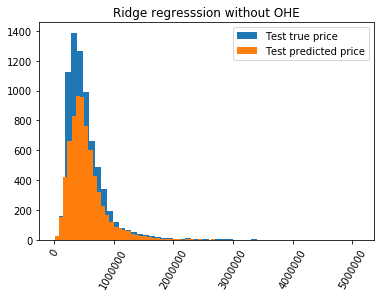

In [69]:
plt.hist(y_test, bins=50, label='Test true price')
plt.hist(y_pred, bins=50, label='Test predicted price')
plt.xticks(rotation = 60);
plt.title("Ridge regresssion without OHE")
plt.legend();

In [70]:
# Q23.2 Use decision tree regression

# Use grid search to select optimal hyperparamters of your models. 
# Q24.2 Depth for the tree    Answer: 10 

# Compute train and test mean squared error for your best models (list of float).
# Q25.2 Train, test MSE using decision tree regression         Answer: look down

# Compute train and test R^2 for your best models (list of float).
# Q26.2 Train, test R^2 using decision tree regression Answer: 0.921,0.786

In [71]:
from sklearn.tree import DecisionTreeRegressor
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.33, random_state=7)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=1)

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

In [72]:
rmse_val = {}
for i in range(2,12):
    reg2 = DecisionTreeRegressor(max_depth=i)
    reg2.fit(X_train, y_train)
    y_val_pred = reg2.predict(X_val)
    rmse_val[alpha] = np.sqrt(mse(y_val_pred, y_val))
    
print(min(rmse_val.items(), key=lambda x: x[1]))

(10.0, 167310.73754492824)


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

# # Scale numeric features
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Train model with optimal hyperparameter
reg2 = DecisionTreeRegressor(max_depth=min(rmse_val.items(), key=lambda x: x[1])[0])
reg2.fit(X_train, y_train)

y_train_pred=reg2.predict(X_train)

# Predict on unseen data
y_pred = reg2.predict(X_test)

# Compute model performance
print("DecTree train MSE (sqrt(MSE)) is ", round(np.sqrt(mse(y_train, y_train_pred)),3))
print("DecTree test MSE (sqrt(MSE)) is ", round(np.sqrt(mse(y_test, y_pred)),3))

r2_reg_train=r2_score(y_train,y_train_pred)
r2_reg_test=r2_score(y_test, y_pred)

print("DecTree train R2 is ", round(r2_reg_train,3))
print("DecTree test R2 is ", round(r2_reg_test,3))

DecTree train MSE (sqrt(MSE)) is  105635.026
DecTree test MSE (sqrt(MSE)) is  162454.608
DecTree train R2 is  0.921
DecTree test R2 is  0.782


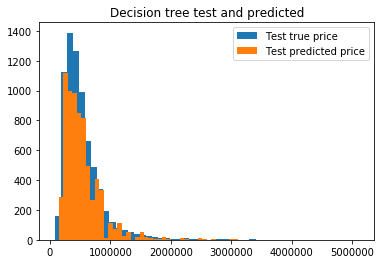

In [74]:
plt.hist(y_test, bins=50, label='Test true price')
plt.hist(y_pred, bins=50, label='Test predicted price')
plt.title("Decision tree test and predicted")
plt.legend();

In [75]:
# Q27 Which features have largest (by absolute value) weight in your linear model (top 5 features)? (list of str).
#Answer: yr_renovated, median,sqft_above,std,sqft_living

In [76]:
coefficients = pd.DataFrame({"Feature":X.columns,"Coefficients":np.abs(np.transpose(reg.coef_))})


In [77]:
q=coefficients.sort_values(by=["Coefficients"])
q.iloc[-5:, ]

,Feature,Coefficients
25,sqm_aver_floor_area,6.952742e+05
8,grade,8.520729e+05
22,was_renovated,3.275621e+06
12,yr_renovated,3.325854e+06
30,median,5.816389e+06


In [78]:
q.iloc[-5:, 1]

25    6.952742e+05
8     8.520729e+05
22    3.275621e+06
12    3.325854e+06
30    5.816389e+06
Name: Coefficients, dtype: float64

# Let's delete some other features, make OHE and run again 

In [79]:
data.drop(['std','median','lat','long','sqft_living15','sqm_tot_area','day','weekday'], axis=1, inplace=True)
pd.options.display.max_columns =40
data.drop(['house_age_10'], axis=1, inplace=True)
data.drop(['yr_built'], axis=1, inplace=True)
data.drop(['yr_renovated'], axis=1, inplace=True)
data1=data #saving

In [80]:
data["waterfront"].value_counts()
data["view"].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

In [81]:
#from stack https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python 
##def encode_and_bind(original_dataframe, feature_to_encode):
##    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
##    res = pd.concat([original_dataframe, dummies], axis=1)
##       return(res)

features_to_encode = ['waterfront', 'zipcode', 'year','month', 'was_renovated']
#for feature in features_to_encode:
#    data = encode_and_bind(data, feature)

In [82]:
#for feature in features_to_encode:
#    res = encode_and_bind(data, feature)

In [83]:
data=pd.get_dummies(data, columns=features_to_encode)
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,sqft_lot15,sqft_tot_area,sqm_aver_floor_area,high_class,n_houses_yr_built,house_age,waterfront_0,waterfront_1,zipcode_98001,...,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,year_2014,year_2015,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,was_renovated_0,was_renovated_1
0,300000.0,6,3.00,2400,9373,2.0,0,3,7,2400,0,7316,21149,982.403196,0,224,24,1,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,280000.0,6,3.00,2400,9373,2.0,0,3,7,2400,0,7316,21149,982.403196,0,224,23,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,647500.0,4,1.75,2060,26036,1.0,0,4,8,1160,900,21891,53477,4968.175870,0,263,67,1,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,400000.0,3,1.00,1460,43000,1.0,0,3,7,1460,0,20023,66733,6199.698568,0,220,62,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,235000.0,3,1.00,1430,7599,1.5,0,4,6,1010,420,10320,21059,1304.296746,0,90,85,1,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,365000.0,5,2.00,1600,4168,1.5,0,3,7,1600,0,4168,11126,689.092815,0,115,87,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
21609,380000.0,2,1.00,1040,7372,1.0,0,5,7,840,200,5150,15692,1457.834504,0,106,76,1,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
21610,339000.0,3,1.00,1100,4128,1.0,0,4,7,720,380,4538,11656,1082.877834,0,223,72,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
21611,399900.0,2,1.75,1410,1005,1.5,0,3,9,900,510,1188,5553,343.927054,0,130,3,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [84]:
# Q28 Save your .ipynb file: Name_Surname_HA1.ipynb, you will be asked to upload it into the google form.

(0.3359818286283781, 165636.35799204124)
Ridge train MSE (sqrt(MSE)) is  165241.892
Ridge test MSE (sqrt(MSE)) is  148625.809
Ridge train R2 is  0.807
Ridge test R2 is  0.817


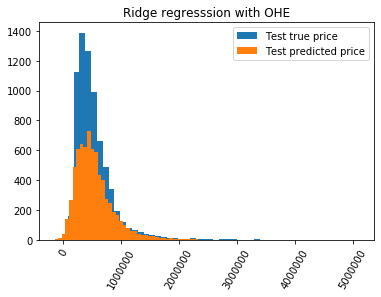

In [85]:
X = data.iloc[:, 1:] #features
y = data['price']   #labels


X_train, _, y_train, _ = train_test_split(X, y, test_size=0.33, random_state=7)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=1)

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

rmse_val = {}
for alpha in np.logspace(-6,1,20):
    reg = Ridge(alpha=alpha)
    reg.fit(X_train, y_train)
    y_val_pred = reg.predict(X_val)
    rmse_val[alpha] = np.sqrt(mse(y_val_pred, y_val))
    
print(min(rmse_val.items(), key=lambda x: x[1]))

# Same train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

# # Scale numeric features
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Train model with optimal hyperparameter
reg = Ridge(alpha=min(rmse_val.items(), key=lambda x: x[1])[0])
reg.fit(X_train, y_train)

y_train_pred=reg.predict(X_train)

# Predict on unseen data
y_pred = reg.predict(X_test)

# Compute model performance
print("Ridge train MSE (sqrt(MSE)) is ", round(np.sqrt(mse(y_train, y_train_pred)),3))
print("Ridge test MSE (sqrt(MSE)) is ", round(np.sqrt(mse(y_test, y_pred)),3))

r2_reg_train=r2_score(y_train,y_train_pred)
r2_reg_test=r2_score(y_test, y_pred)

print("Ridge train R2 is ", round(r2_reg_train,3))
print("Ridge test R2 is ", round(r2_reg_test,3))

plt.hist(y_test, bins=50, label='Test true price')
plt.hist(y_pred, bins=50, label='Test predicted price')
plt.xticks(rotation = 60);
plt.title("Ridge regresssion with OHE")
plt.legend();

In [86]:
coefficients = pd.DataFrame({"Feature":X.columns,"Coefficients":np.abs(np.transpose(reg.coef_))})
q=coefficients.sort_values(by=["Coefficients"])
q.iloc[-5:, ]

,Feature,Coefficients
7,grade,6.545609e+05
0,bedrooms,9.110000e+05
2,sqft_living,9.991607e+05
42,zipcode_98039,1.245244e+06
8,sqft_above,1.306089e+06


Now top features look much more reasonable.

(10.0, 212062.47729152587)
DecTree train MSE (sqrt(MSE)) is  138467.185
DecTree test MSE (sqrt(MSE)) is  196483.644
DecTree train R2 is  0.865
DecTree test R2 is  0.681


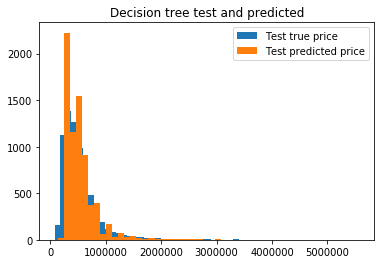

In [87]:
from sklearn.tree import DecisionTreeRegressor

X_train, _, y_train, _ = train_test_split(X, y, test_size=0.33, random_state=7)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=1)

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

rmse_val = {}
for i in range(2,12):
    reg2 = DecisionTreeRegressor(max_depth=i)
    reg2.fit(X_train, y_train)
    y_val_pred = reg2.predict(X_val)
    rmse_val[alpha] = np.sqrt(mse(y_val_pred, y_val))
    
print(min(rmse_val.items(), key=lambda x: x[1]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

# # Scale numeric features
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Train model with optimal hyperparameter
reg2 = DecisionTreeRegressor(max_depth=min(rmse_val.items(), key=lambda x: x[1])[0])
reg2.fit(X_train, y_train)

y_train_pred=reg2.predict(X_train)

# Predict on unseen data
y_pred = reg2.predict(X_test)

# Compute model performance
print("DecTree train MSE (sqrt(MSE)) is ", round(np.sqrt(mse(y_train, y_train_pred)),3))
print("DecTree test MSE (sqrt(MSE)) is ", round(np.sqrt(mse(y_test, y_pred)),3))

r2_reg_train=r2_score(y_train,y_train_pred)
r2_reg_test=r2_score(y_test, y_pred)

print("DecTree train R2 is ", round(r2_reg_train,3))
print("DecTree test R2 is ", round(r2_reg_test,3))

plt.hist(y_test, bins=50, label='Test true price')
plt.hist(y_pred, bins=50, label='Test predicted price')
plt.title("Decision tree test and predicted")
plt.legend()
plt.show()